# Day04_pandas_csv
<font size=5><b>Pandas 활용한 전처리<b></font>
<div align='right'>류 회 성(Hoe Sung Ryu)</div>

    
![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99298F365B1A19AF0A)

    
    
---

In [1]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv('../data/water_quality.csv', 
                       encoding='CP949', # encoding problem utf-8
                       engine='python')
raw_data.head()

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,백수,모라,양 성,10.0,6.7,부적합
1,2,이칠,모라,음 성,20.0,0.9,적합
2,3,운수사,모라,음 성,10.0,1.1,적합
3,4,서당골,모라,음 성,10.0,NaN,적합
4,5,청수,괘법,음 성,20.0,2.7,적합


In [2]:
raw_data.tail()

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
19,20,승학,학장,양 성,NaN,0.3,부적합
20,21,거북,학장,음 성,20.0,1.0,적합
21,22,백련,엄궁,양 성,40.0,1.9,부적합
22,23,불심,엄궁,음 성,20.0,1.7,적합
23,24,승학,엄궁,음 성,20.0,2.6,적합


In [3]:
# 적합한 데이터만 가져온것
tmp = raw_data[raw_data['적합'] == '적합']
tmp.pivot_table(index = '약수터명',
               aggfunc = 'mean',
               values=['일반세균', '질산성질소'])

,일반세균,질산성질소
약수터명,,
거북,20.0,1.0
건강,10.0,1.8
괘내,20.0,3.1
백양정,10.0,7.5
복천,20.0,2.4
불심,20.0,1.7
사상,10.0,2.2
삼각산,10.0,2.7
삼운정,20.0,3.8


In [4]:
!conda install missingno -y 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



<AxesSubplot:>

/Users/hoesungryu/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hoesungryu/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hoesungryu/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hoesungryu/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hoesungryu/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_t

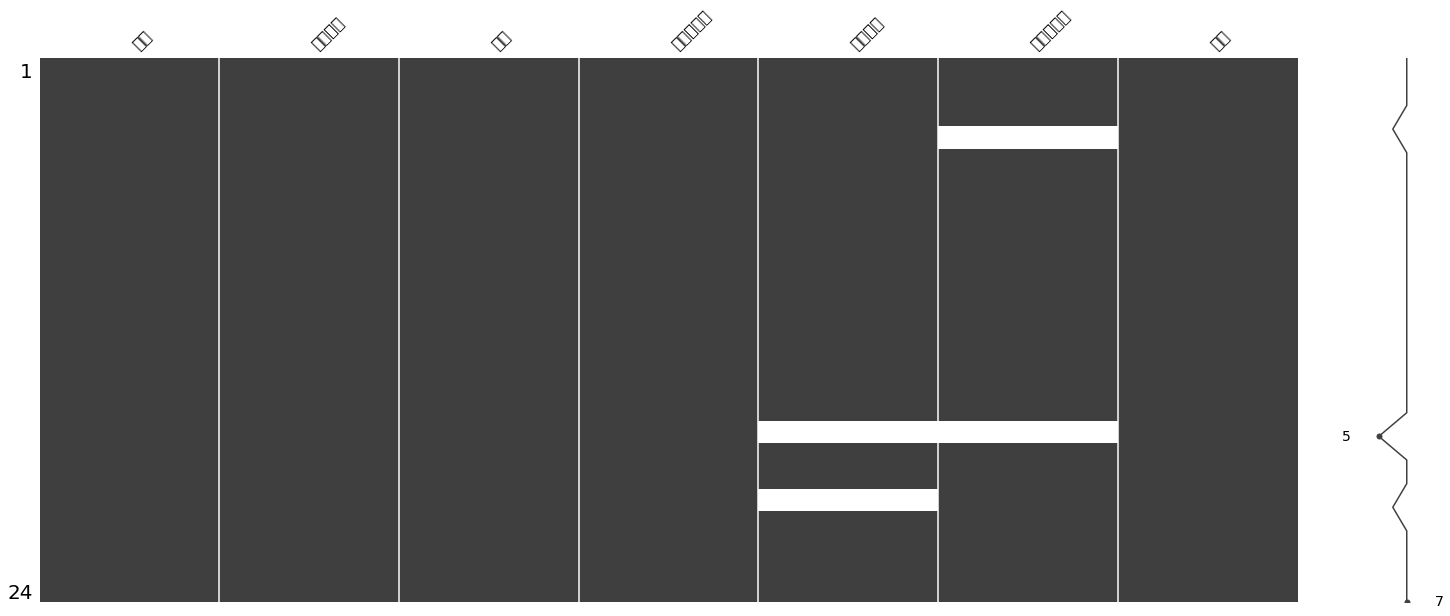

In [5]:
import missingno as msno
msno.matrix(raw_data)

## 결측치 보간하기
raw_data.isna().sum()

In [6]:
# 결측치 확인
raw_data.isna().sum()

연번       0
약수터명     0
동명       0
총대장균군    0
일반세균     2
질산성질소    2
적합       0
dtype: int64

### 결측치 날리기 

In [7]:
raw_data.dropna()

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,백수,모라,양 성,10.0,6.7,부적합
1,2,이칠,모라,음 성,20.0,0.9,적합
2,3,운수사,모라,음 성,10.0,1.1,적합
4,5,청수,괘법,음 성,20.0,2.7,적합
5,6,사상,괘법,음 성,10.0,2.2,적합
6,7,탑골,괘법,양 성,10.0,2.6,부적합
7,8,삼각산,괘법,음 성,10.0,2.7,적합
8,9,괘내,괘법,음 성,20.0,3.1,적합
9,10,황씨묘위,감전,음 성,10.0,3.1,적합
10,11,체육공원,감전,음 성,20.0,4.0,적합


### 결측치를 0으로 채우기 

In [8]:
raw_data.fillna(0)

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,백수,모라,양 성,10.0,6.7,부적합
1,2,이칠,모라,음 성,20.0,0.9,적합
2,3,운수사,모라,음 성,10.0,1.1,적합
3,4,서당골,모라,음 성,10.0,0.0,적합
4,5,청수,괘법,음 성,20.0,2.7,적합
5,6,사상,괘법,음 성,10.0,2.2,적합
6,7,탑골,괘법,양 성,10.0,2.6,부적합
7,8,삼각산,괘법,음 성,10.0,2.7,적합
8,9,괘내,괘법,음 성,20.0,3.1,적합
9,10,황씨묘위,감전,음 성,10.0,3.1,적합


### 결측치를 평균 으로 채우기 

In [9]:
raw_data.fillna(raw_data.mean())

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,백수,모라,양 성,10.000000,6.700000,부적합
1,2,이칠,모라,음 성,20.000000,0.900000,적합
2,3,운수사,모라,음 성,10.000000,1.100000,적합
3,4,서당골,모라,음 성,10.000000,2.631818,적합
4,5,청수,괘법,음 성,20.000000,2.700000,적합
5,6,사상,괘법,음 성,10.000000,2.200000,적합
6,7,탑골,괘법,양 성,10.000000,2.600000,부적합
7,8,삼각산,괘법,음 성,10.000000,2.700000,적합
8,9,괘내,괘법,음 성,20.000000,3.100000,적합
9,10,황씨묘위,감전,음 성,10.000000,3.100000,적합


### interpolationa 방법을 사용하기 
- 각 열의 값을 보고 채우기 axis=0 
- pandas interpolate(보간법) 함수를 사용해서 결측치를 채운다
> method=linear 보간법 함수가 linear 
> limit_direction='backward' # 뒤에서 부터 채워 오기 
> limit_direction='forward' # 앞에서 채우기 
> limit_direction='both' # 양 옆에서 채워나가기 

In [10]:
raw_data.interpolate(method='linear', axis=0, limit_direction='both')

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,백수,모라,양 성,10.0,6.7,부적합
1,2,이칠,모라,음 성,20.0,0.9,적합
2,3,운수사,모라,음 성,10.0,1.1,적합
3,4,서당골,모라,음 성,10.0,1.9,적합
4,5,청수,괘법,음 성,20.0,2.7,적합
5,6,사상,괘법,음 성,10.0,2.2,적합
6,7,탑골,괘법,양 성,10.0,2.6,부적합
7,8,삼각산,괘법,음 성,10.0,2.7,적합
8,9,괘내,괘법,음 성,20.0,3.1,적합
9,10,황씨묘위,감전,음 성,10.0,3.1,적합


In [11]:
# 결측치 확인
raw_data.isna().sum()

연번       0
약수터명     0
동명       0
총대장균군    0
일반세균     2
질산성질소    2
적합       0
dtype: int64

In [12]:
# 재할당 해주어야된다
raw_data = raw_data.dropna()

In [13]:
# 결측치 확인
raw_data.isna().sum()

연번       0
약수터명     0
동명       0
총대장균군    0
일반세균     0
질산성질소    0
적합       0
dtype: int64

### labeling 

In [14]:
print(raw_data['적합'].unique())
print(raw_data['총대장균군'].unique())

['부적합' '적합']
['양 성' '음 성']


In [15]:
raw_data['적합'] = raw_data['적합'].map({'부적합':0, '적합':1})
raw_data.head()

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,백수,모라,양 성,10.0,6.7,0
1,2,이칠,모라,음 성,20.0,0.9,1
2,3,운수사,모라,음 성,10.0,1.1,1
4,5,청수,괘법,음 성,20.0,2.7,1
5,6,사상,괘법,음 성,10.0,2.2,1


In [16]:
raw_data['총대장균군'] = raw_data['총대장균군'].map({'음 성':0, '양 성':1})

In [17]:
 # sklean에서 preprocessing모듈 속에 labelencoder 함수를 사용
from sklearn.preprocessing import LabelEncoder 

In [18]:
# 약수터명
name_le = LabelEncoder()# 사용할 함수를 정의
name = name_le.fit_transform(raw_data['약수터명']) # 인코딩을 하겠다
name

array([ 5, 16, 15, 17, 10, 19, 11,  2, 20, 18,  1,  6,  7, 13,  8, 12,  3,
        0,  4,  9, 14])

In [19]:
# 동명
dong_le = LabelEncoder()# 사용할 함수를 정의
dong = dong_le.fit_transform(raw_data['동명']) # 인코딩을 하겠다
dong

array([2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 4, 4, 4, 4, 4, 4, 4, 5, 3, 3, 3])

In [20]:
raw_data['약수터명'] = name
raw_data['동명'] = dong


In [21]:
raw_data.head()

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,5,2,1,10.0,6.7,0
1,2,16,2,0,20.0,0.9,1
2,3,15,2,0,10.0,1.1,1
4,5,17,1,0,20.0,2.7,1
5,6,10,1,0,10.0,2.2,1


In [22]:
raw_data

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,5,2,1,10.0,6.7,0
1,2,16,2,0,20.0,0.9,1
2,3,15,2,0,10.0,1.1,1
4,5,17,1,0,20.0,2.7,1
5,6,10,1,0,10.0,2.2,1
6,7,19,1,1,10.0,2.6,0
7,8,11,1,0,10.0,2.7,1
8,9,2,1,0,20.0,3.1,1
9,10,20,0,0,10.0,3.1,1
10,11,18,0,0,20.0,4.0,1
